In [2]:
import pandas as pd
data_game = pd.read_csv('./game.csv')
print(data_game)

     Расса         Вес  Скорость  Интеллект        Рост
0      Огр  104.983419  3.141676          4  177.216373
1    Зомби   52.814040  8.254263          1  173.102442
2    Зомби   47.458189  7.462941          2  177.644210
3    Зомби   45.104692  8.713320          2  169.065567
4      Огр  100.964789  5.922363          6  175.752407
..     ...         ...       ...        ...         ...
65   Зомби   77.534560  8.133887          1  178.099347
66   Зомби   49.165593  6.470099          3  165.136738
67  Гоблин   66.628751  8.892539          5  159.987618
68   Зомби   61.192708  8.709177          1  151.963320
69     Огр  111.120885  4.914444          3  195.413855

[70 rows x 5 columns]


C:\Users\Kege\AppData\Local\Temp\ipykernel_19700\2316841978.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_game['Расса_enc'] = encoder.fit_transform(data_game['Расса'])
print(data_game)

     Расса         Вес  Скорость  Интеллект        Рост  Расса_enc
0      Огр  104.983419  3.141676          4  177.216373          2
1    Зомби   52.814040  8.254263          1  173.102442          1
2    Зомби   47.458189  7.462941          2  177.644210          1
3    Зомби   45.104692  8.713320          2  169.065567          1
4      Огр  100.964789  5.922363          6  175.752407          2
..     ...         ...       ...        ...         ...        ...
65   Зомби   77.534560  8.133887          1  178.099347          1
66   Зомби   49.165593  6.470099          3  165.136738          1
67  Гоблин   66.628751  8.892539          5  159.987618          0
68   Зомби   61.192708  8.709177          1  151.963320          1
69     Огр  111.120885  4.914444          3  195.413855          2

[70 rows x 6 columns]


In [4]:
X_game = data_game[["Вес", "Скорость", "Интеллект", "Рост"]].values
Y_game = data_game['Расса_enc'].values
print(X_game)
print(Y_game)

[[104.98341882   3.1416756    4.         177.21637255]
 [ 52.8140399    8.25426324   1.         173.10244241]
 [ 47.45818941   7.46294076   2.         177.6442099 ]
 [ 45.10469196   8.7133201    2.         169.06556677]
 [100.96478863   5.92236285   6.         175.75240738]
 [ 86.55041459   4.74343016   5.         211.20456144]
 [ 76.32213361   6.5326142    3.         160.46819008]
 [ 78.26267577   8.40988528   2.         182.82299941]
 [ 44.20348094   7.66486408   3.         158.21866131]
 [ 64.03111609   7.64054679   3.         171.88925741]
 [ 57.30994656   6.86846758   4.         165.79281146]
 [ 74.34625537   7.7493818    5.         168.45898695]
 [ 78.05483827   6.72163569   1.         163.59885108]
 [ 83.47671392   5.73333995   6.         214.76134953]
 [ 55.97082496   6.57541512   4.         157.66054846]
 [ 49.07143044   8.85554804   3.         184.51976196]
 [108.68952945   4.01669479   6.         184.77084632]
 [ 69.28182462   6.43934595   7.         156.97178553]
 [ 72.0937

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_gm_tr, X_gm_ts, y_gm_tr, y_gm_ts = train_test_split(X_game, Y_game, test_size=0.3, random_state=42)

k = 1
k_game_model = KNeighborsClassifier(n_neighbors=k)

k_game_model.fit(X_gm_tr, y_gm_tr)

Y_gm_pred = k_game_model.predict(X_gm_ts)
accuracy = accuracy_score(y_gm_ts, Y_gm_pred)
print(f"Точеность предсказаний: {accuracy}")

print(k_game_model.predict([[50, 10, 25, 200]]))

Точеность предсказаний: 0.7619047619047619
[1]


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

frs_game = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=42)
frs_game.fit(X_gm_tr, y_gm_tr)

y_gm_pred_frs = frs_game.predict(X_gm_ts)

accuracy = accuracy_score(y_gm_ts, y_gm_pred_frs)
print(f"Точеность предсказаний: {accuracy}")

print(k_game_model.predict([[50, 10, 10, 200]]))

Точеность предсказаний: 0.8095238095238095
[1]


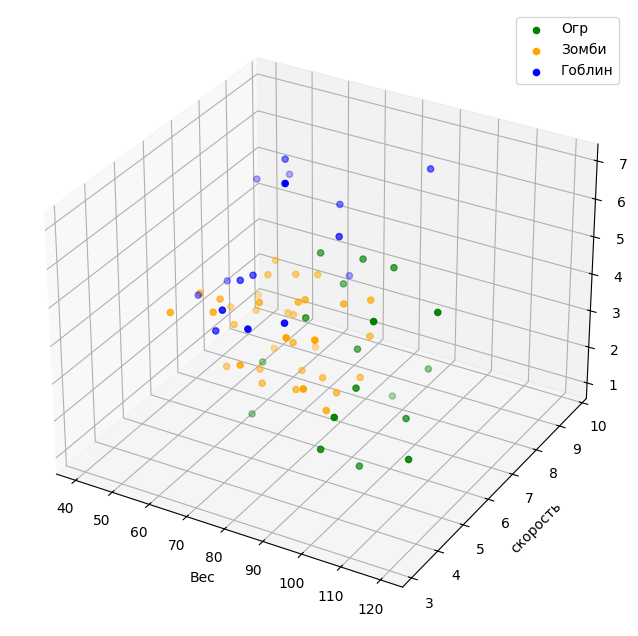

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(data_game['Расса'].unique(), ['green', 'orange', 'blue']):
    df = data_game[data_game['Расса'] == label]
    ax.scatter(df['Вес'], df['Скорость'], df['Интеллект'], c=color, label=label)

ax.set_xlabel('Вес')
ax.set_ylabel('скорость')
ax.set_zlabel('Интеллект')

plt.legend()
plt.show()

In [16]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_gm_tr, y_gm_tr)
y_pred_clf = clf.predict(X_gm_ts)

accuracy = accuracy_score(y_gm_ts, y_pred_clf)
print(f"Точеность предсказаний: {accuracy}")

Точеность предсказаний: 0.7619047619047619
